In [1]:
!cd /content/
!rm -rf convnet2
# Clonamos el repositorio
!git clone https://github.com/alvaro-neira/convnet2.git --branch tarea1

Cloning into 'convnet2'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (343/343), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 343 (delta 220), reused 201 (delta 103), pack-reused 0
Receiving objects: 100% (343/343), 212.78 KiB | 2.73 MiB/s, done.
Resolving deltas: 100% (220/220), done.


In [2]:
!pwd  # muestra el directorio actual
!ls   # muestra el contenido de este (archivos y directorios)

/content
convnet2  sample_data


## Preparación de los datos

In [3]:
# Crear directorios para datos y snapshots
!mkdir -p /content/convnet2/snapshots
!mkdir -p /content/convnet2/logs
!mkdir -p /content/convnet2/data

!ls convnet2

configs   models	      ssearch.py	     train_siamese.py
data	  README.md	      ssearch_with_merge.py  train_simple.py
datasets  release_siamese.py  test_tfrecords.py      utils
logs	  snapshots	      train.py


In [4]:
# Descargar y descomprimir los datos
%cd /content/convnet2/data
!wget https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa -O data.zip
!unzip -q -o data.zip
!unzip -q -o train_images.zip
!unzip -q -o test_images.zip
!rm data.zip
!rm train_images.zip
!rm test_images.zip
!ls

/content/convnet2/data
--2021-11-13 17:13:45--  https://www.dropbox.com/sh/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa [following]
--2021-11-13 17:13:46--  https://www.dropbox.com/sh/raw/hsqjv0kd13xda3g/AABYkVk0ruG85s4aL4C1nDKaa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf4ef2f75b2018349cbfa64312.dl.dropboxusercontent.com/zip_download_get/A9SKWw9ZWqMaqBWSIf6zk80sD9o_F9BzjKo3PDHTIWXd7Rez1jBQARBwLE3fw7e3Q6HFjygKvZmnyf2rfjlhM7aWqXEdCA5by2ckdk7P1Id0HA# [following]
--2021-11-13 17:13:46--  https://uccf4ef2f75b2018349cbfa64312.dl.dropboxusercontent.com/zip_download_get/A9SKWw9ZWqMaqBWSIf6zk80sD9o_F9BzjKo3PDHTIWXd7Rez1jBQARBwLE3

## Generación de TFRecords

Al igual que en la clase anterior, convertiremos los datos a un formato binario que TensorFlow puede manejar de manera eficiente (más información sobre tfrecords [aquí](https://www.tensorflow.org/tutorials/load_data/tfrecord)). Para esto, haremos las siguientes modificaciones:

En el archivo ```/content/convnet2/configs/sbir_cl.config```:

* NUM_EPOCHS = 20
* VALIDATION_STEPS = 16
* SNAPSHOT_DIR = /content/convnet2/snapshots/
* DATA_DIR = /content/convnet2/data/Sketch_EITZ/

In [5]:
# Creamos los tfrecords ~3 minutos
%cd /content/convnet2
!git fetch --all
!git checkout ssearch_tfr
!git pull origin ssearch_tfr
!cp tarea1/train.txt /content/convnet2/data
!cp tarea1/test.txt /content/convnet2/data
!python datasets/create_tfrecords.py -type all -config configs/aneira_tfr.config -name SKETCH


/content/convnet2
Fetching origin
Branch 'ssearch_tfr' set up to track remote branch 'ssearch_tfr' from 'origin'.
Switched to a new branch 'ssearch_tfr'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch_tfr -> FETCH_HEAD
Already up to date.
---0
---500
---1000
---1500
---2000
---2500
---3000
---3500
---4000
---4500
---5000
---5500
---6000
---6500
---7000
---7500
---8000
---8500
---9000
---9500
---10000
---10500
---11000
---11500
---11999
train_record saved at /content/convnet2/data/train.tfrecords.
mean_file (224, 224, 3)
mean_file saved at /content/convnet2/data/mean.dat.
shape_file saved at /content/convnet2/data/shape.dat.
---0
---500
---1000
---1500
---2000
---2398
test_record saved at /content/convnet2/data/test.tfrecords.
tfrecords created for /content/convnet2/data


In [6]:
!ls /content/convnet2/data

mapping.txt  shape.dat	  test.tfrecords  train_images	   train.txt
mean.dat     test_images  test.txt	  train.tfrecords


## Entrenamiento

A continuación, entrenaremos los modelos ResNet con los datos recién generados.

### ResNet-34



In [7]:
%cd /content/convnet2
!git fetch --all
!git checkout ssearch_tfr_resnet34
!git pull origin ssearch_tfr_resnet34
!rm -rf snapshots/*
!python train_simple.py -mode train -config configs/aneira_tfr.config -name SKETCH # ~12 minutos

/content/convnet2
Fetching origin
Branch 'ssearch_tfr_resnet34' set up to track remote branch 'ssearch_tfr_resnet34' from 'origin'.
Switched to a new branch 'ssearch_tfr_resnet34'
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch_tfr_resnet34 -> FETCH_HEAD
Already up to date.
2021-11-13 17:18:20.343188: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 

## Predicciones

A continuación, veremos algunas predicciones de ejemplo utilizando los pesos aprendidos por este último modelo. Para esto, copiaremos el último checkpoint desde Google Drive a la sesión de Colab (si no se ha cerrado la sesión desde el entrenamiento, este paso no será necesario). Podemos acceder al contenido de nuestro Drive con el botón "Activar unidad de Drive" en el menú de la izquierda.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!mkdir -p /content/drive/MyDrive/tarea1
!cp /content/convnet2/snapshots/020.h5 /content/drive/MyDrive/tarea1/resnet34.h5
#%cd /content/convnet2/
#!cp /content/drive/MyDrive/2021-2/sección_1/04/snapshots/resnet34_pretrained_011.h5 snapshots

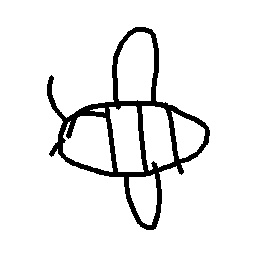

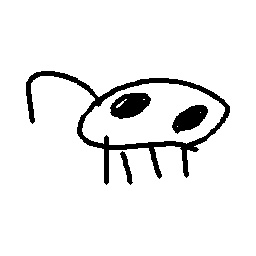

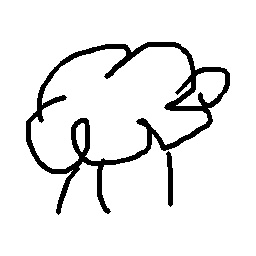

In [13]:
from IPython.display import Image, display

display(Image('/content/convnet2/data/test_images/bee/026_00119695.jpg', width=200, height=200))
display(Image('/content/convnet2/data/test_images/cow/081_00122082.jpg', width=200, height=200))
display(Image('/content/convnet2/data/test_images/sheep/258_00124921.jpg', width=200, height=200))

In [15]:
%cd /content/convnet2
!git fetch --all
!git checkout resnet34_prediction
!git pull origin resnet34_prediction
!python train_simple.py -mode predict -config configs/aneira_tfr.config -name SKETCH # no delay


/content/convnet2
Fetching origin
Already on 'resnet34_prediction'
Your branch is up to date with 'origin/resnet34_prediction'.
From https://github.com/alvaro-neira/convnet2
 * branch            resnet34_prediction -> FETCH_HEAD
Already up to date.
2021-11-13 17:58:29.188598: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          multiple                 

## Búsqueda por similitud

Finalmente, usaremos la salida de la última capa convolucional de ResNet-34 (con un global average pooling) para realizar una búsqueda por similitud. Utilizaremos el archivo ```/content/convnet2/ssearch.py```. El primer paso es preparar un directorio y un catálogo:

In [ ]:
# # Generamos un archivo catalog.txt que contiene la ruta de las imágenes
# %cd /content/data/dataset_atributos

# import os

# filenames = []
# thisdir = os.getcwd()  # current working directory
# print(f"directorio actual: {thisdir}")
# # r=root, d=directories, f = files
# for r, d, f in os.walk(thisdir):
#     for file in f:
#         if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
#             filenames.append(os.path.join(r, file))
#         else:
#             print(os.path.join(r, file))

# print(f"total de imágenes: {len(filenames)}")

# # Escribir la lista de imágenes en un archivo de texto para color
# catalog_dir = "/content/data/features_color/ssearch"
# catalog_filename = os.path.join(catalog_dir, "catalog.txt")

# with open(catalog_filename, 'w') as f:
#     f.write("\n".join(map(str, filenames)))
# print(f"Catálogo guardado en {catalog_filename}")


# # Escribir la lista de imágenes en un archivo de texto para textura
# catalog_dir = "/content/data/features_textura/ssearch"
# catalog_filename = os.path.join(catalog_dir, "catalog.txt")

# with open(catalog_filename, 'w') as f:
#     f.write("\n".join(map(str, filenames)))

# print(f"Catálogo guardado en {catalog_filename}")

In [16]:
!mkdir -p /content/convnet2/data/sketch_folder
%cd /content/convnet2/data/sketch_folder

# Crear directorio para la búsqueda por similitud
!mkdir -p ssearch
!cp /content/convnet2/data/test.txt .
# Eliminar la columna de clasificación del archivo test.txt
!awk 'NF{NF-=1};1' <test.txt >catalog.txt
!mv catalog.txt ssearch/
!cat ssearch/catalog.txt

/content/convnet2/data/sketch_folder
data/test_images/camel/054_00120391.jpg
data/test_images/cow/081_00122031.jpg
data/test_images/duck/099_00134431.jpg
data/test_images/crocodile/084_00126805.jpg
data/test_images/duck/099_00134433.jpg
data/test_images/bee/026_00119880.jpg
data/test_images/duck/099_00134419.jpg
data/test_images/elephant/103_00125793.jpg
data/test_images/crab/082_00125882.jpg
data/test_images/crocodile/084_00126839.jpg
data/test_images/duck/099_00134331.jpg
data/test_images/cow/081_00122030.jpg
data/test_images/cat/064_00122194.jpg
data/test_images/camel/054_00120299.jpg
data/test_images/bee/026_00119859.jpg
data/test_images/dog/091_00151039.jpg
data/test_images/camel/054_00120288.jpg
data/test_images/cow/081_00122075.jpg
data/test_images/cat/064_00122088.jpg
data/test_images/cat/064_00122171.jpg
data/test_images/bear/023_00133754.jpg
data/test_images/camel/054_00120224.jpg
data/test_images/bear/023_00133605.jpg
data/test_images/cow/081_00121940.jpg
data/test_images/be

Haremos una búsqueda por similitud utilizando la distancia coseno entre vectores. 

En el archivo ```/content/convnet2/models/resnet.py```: 

* En el método call de la clase ResNet (línea 230), cambiamos el return a la línea que sigue inmediatamente a x = self.avg_pool(x). De esta forma, la salida del modelo será directamente la capa que necesitamos.

En el archivo ```/content/convnet2/ssearch.py```:

* Reemplazamos las líneas 26 a la 40 por:
```
#loading classifier model
model = resnet.ResNet([3,4,6,3],[64,128,256,512], self.configuration.get_number_of_classes(), se_factor = 0)
input_image = tf.keras.Input((self.input_shape[0], self.input_shape[1], self.input_shape[2]), name = 'input_image')     
model(input_image)    
model.summary()
model.load_weights(self.configuration.get_checkpoint_file(), by_name = True, skip_mismatch = True)
self.sim_model = model
print('sim_model was loaded OK')
#defining process arch
self.process_fun =  imgproc.process_sketch
```

* En el método search (línea 86): descomentamos las líneas sim = ... y definimos ```idx_sorted = np.argsort(-sim)```.



En el archivo ```/content/convnet2/ssearch.py``` 

In [21]:
# Calculamos los feature vectors ~1 minuto
%cd /content/convnet2/
!git fetch --all
!git checkout ssearch
!git pull origin ssearch
!cp data/shape.dat data/sketch_folder/shape.dat
!cp data/mean.dat data/sketch_folder/mean.dat
!python ssearch.py -config configs/aneira_tfr.config -name SKETCH -mode compute

/content/convnet2
Fetching origin
M	ssearch.py
Already on 'ssearch'
Your branch is up to date with 'origin/ssearch'.
From https://github.com/alvaro-neira/convnet2
 * branch            ssearch    -> FETCH_HEAD
Already up to date.
swa
/content/convnet2/data/sketch_folder
swe
2021-11-13 18:51:26.941841: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  21298112  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 classifier (Dense)          

In [ ]:
# Hacemos la búsqueda por similitud 
!python ssearch.py -config configs/sbir_cl.config -name SBIR -mode search

2021-11-02 00:14:49.127446: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-02 00:14:49.127504: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3070311014f5): /proc/driver/nvidia/version does not exist
Model: "res_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
backbone (ResNetBackbone)    multiple                  21298112  
_________________________________________________________________
global_average_pooling2d (Gl multiple                  0         
Total params: 21,298,112
Trainable params: 21,282,880
Non-trainable params: 15,232
_________________________________________________________________
Model: "res_net"
_________________________________________________________________
Layer (type)                 Output Shape              P

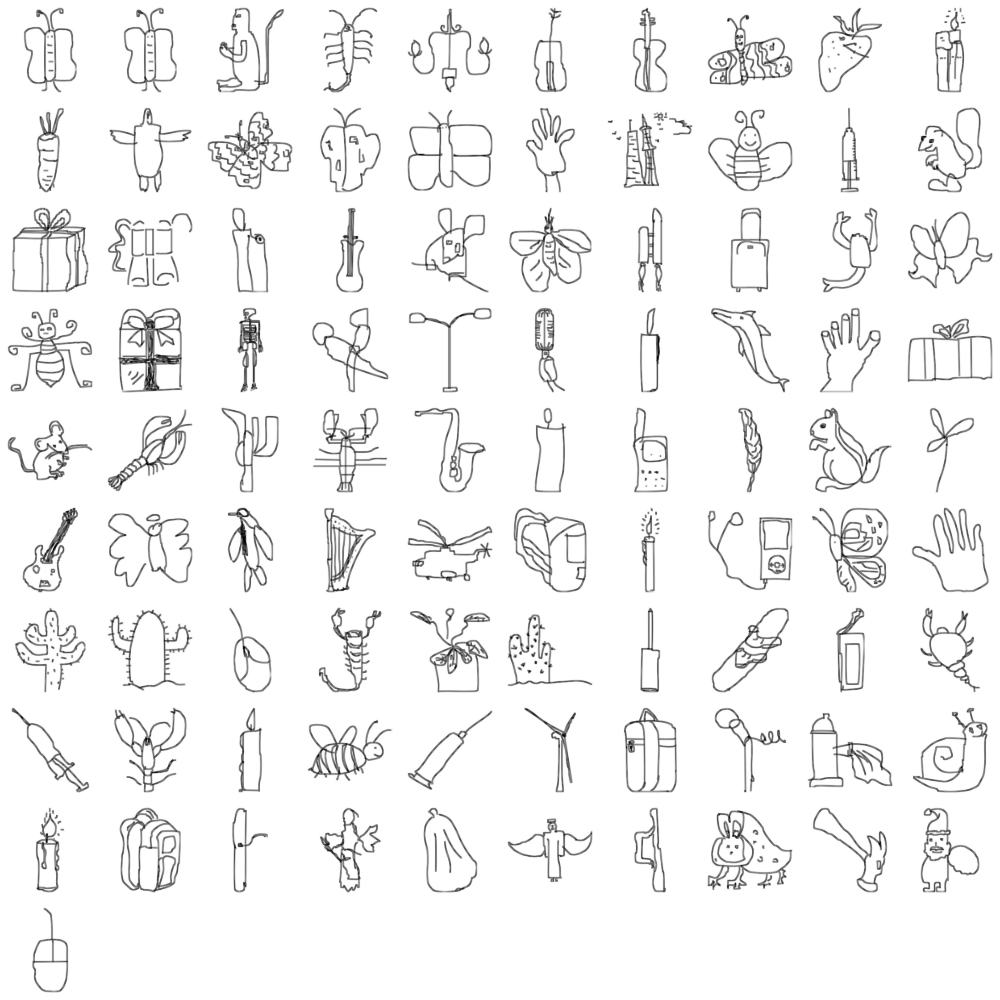

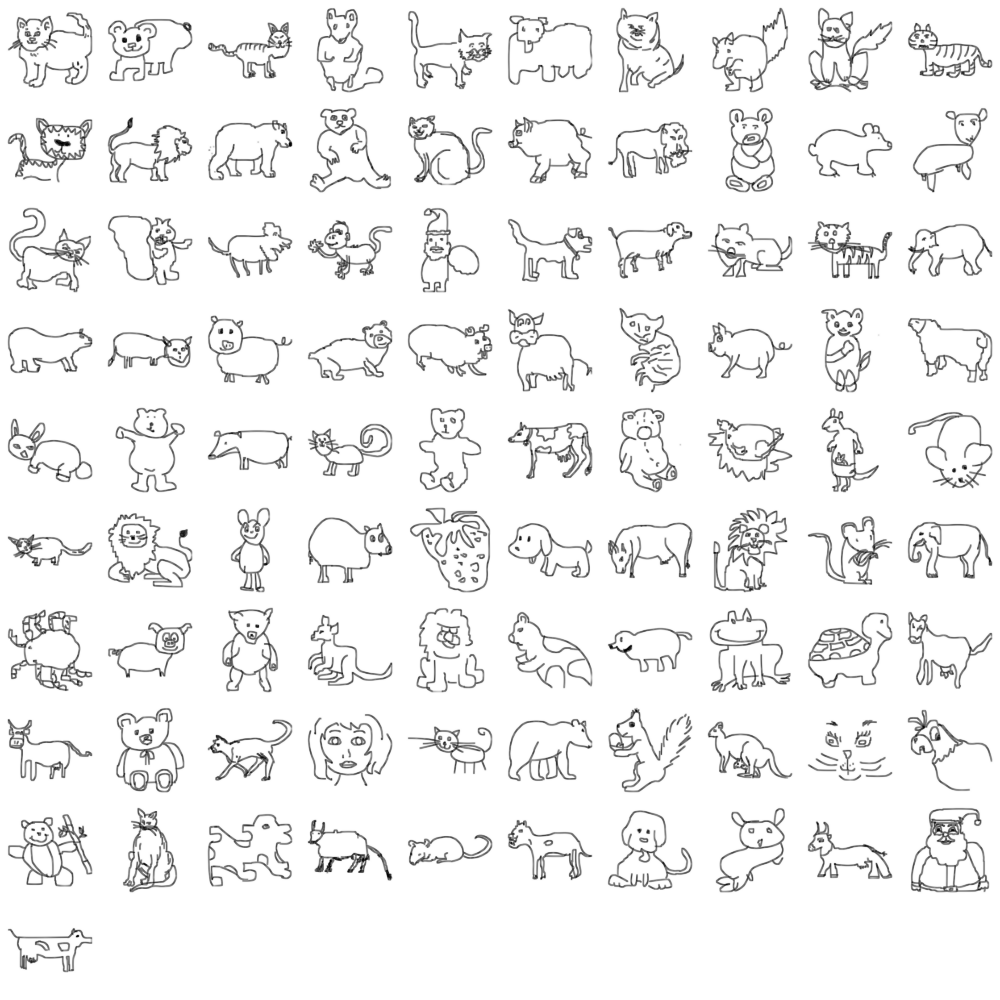

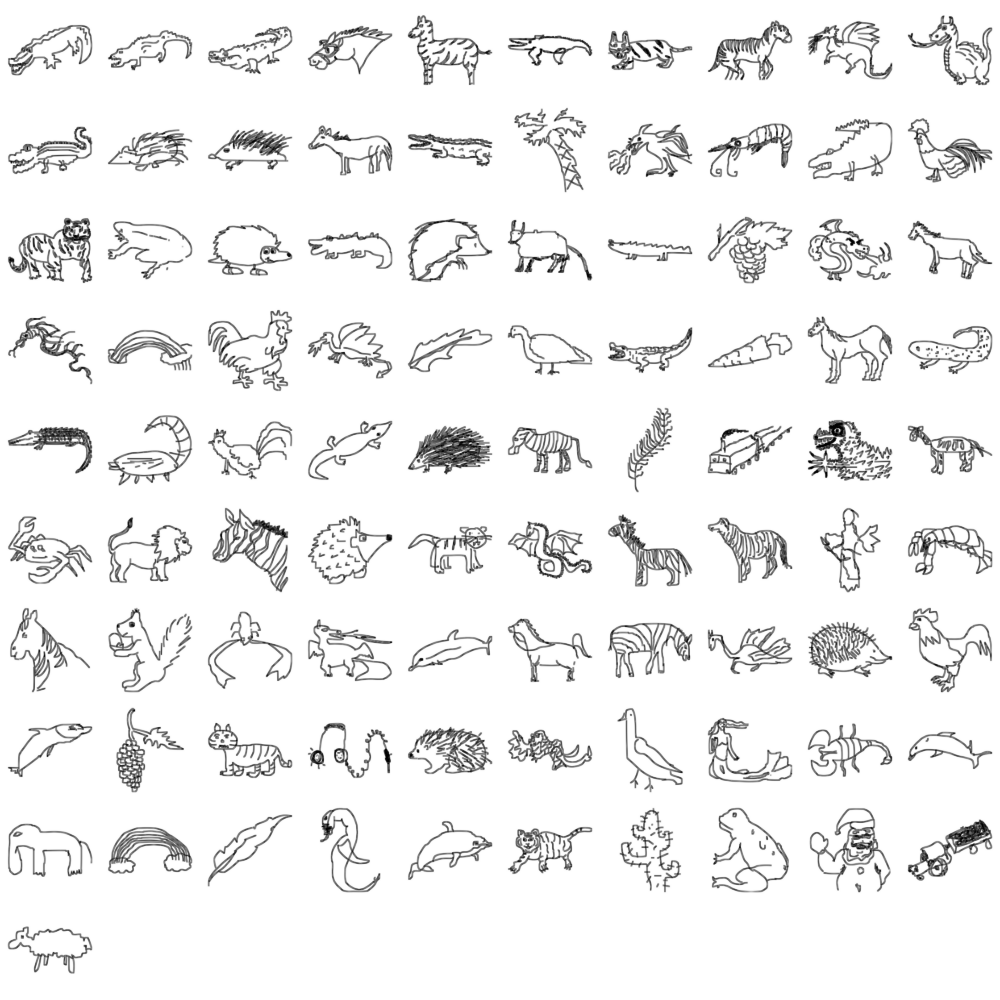

In [ ]:
from IPython.display import Image, display
display(Image('/content/convnet2/2805.png_result.png', width=700, height=700))
display(Image('/content/convnet2/3868.png_result.png', width=700, height=700))
display(Image('/content/convnet2/5006.png_result.png', width=700, height=700))